# Titanic survived Project

Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 



In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


In [8]:
!pip install imbalanced-learn

In [9]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [278]:
#importing dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis

In [12]:
#checking the dimension of the dataset

df.shape

(891, 12)

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [78]:
#checking the types of columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df.tail

<bound method NDFrame.tail of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [79]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

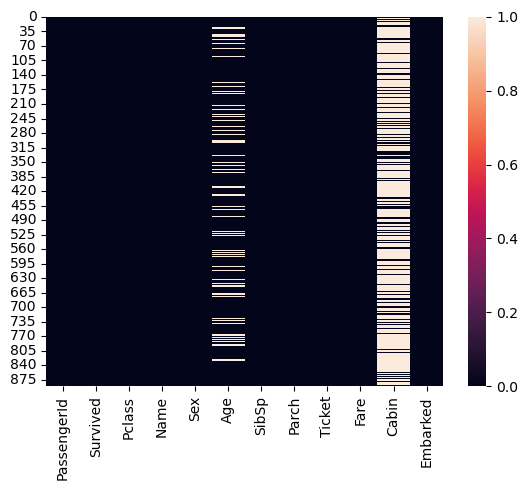

In [14]:
#lets visualize it using heatmap
sns.heatmap(df.isnull())

In [279]:
df.fillna(df['Age'].mean(),inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,29.699118,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,29.699118,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,29.699118,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,29.699118,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,29.699118,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [280]:
df['Age']=df['Age'].astype(int)
df['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [137]:
df.head()

,Survived,Pclass,Name,Sex,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,0,A/5 21171,7.2500,29.699118,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,0,STON/O2. 3101282,7.9250,29.699118,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,0,373450,8.0500,29.699118,S


In [46]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,29.699118,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.45,29.699118,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,29.699118,Q


In [281]:
print(f"The rows and columns in the dataset:{df.shape}")
print(f"\nThe column headers in the dataset:{df.columns}")

The rows and columns in the dataset:(891, 12)

The column headers in the dataset:Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.2+ KB


In [282]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [102]:
#checking the value counts of each column

for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


29    197
24     31
22     27
28     27
30     27
     ... 
66      1
53      1
80      1
12      1
74      1
Name: Age, Length: 71, dtype: int64


0

These are the value counts of all columns, let's check the unique value of column.

In [21]:
df.iloc[890,:]

PassengerId                    891
Survived                         0
Pclass                           3
Name           Dooley, Mr. Patrick
Sex                           male
Age                           32.0
SibSp                            0
Parch                            0
Ticket                      370376
Fare                          7.75
Cabin                    29.699118
Embarked                         Q
Name: 890, dtype: object

In [283]:
#Checking the mean of survived column

print("The mean value of survived is:", df['Survived'].mean())


The mean value of survived is: 0.3838383838383838


In [284]:
#Seperating Numerical and Categorical columns

#checking for categorical columns

categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical Columns:",categorical_col)

#checking for numerical columns

numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical Columns:",numerical_col)


categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [286]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [287]:
#checking number of unique values in each column

df.nunique().to_frame("No. of unique values")

,No. of unique values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,71
SibSp,7
Parch,7
Ticket,681
Fare,248


In [106]:
#checking the list of counts of target

df["Survived"].unique()

array([0, 1], dtype=int64)

In [288]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This gives the statistical information of the numerical columns. The summary of the dataset looks perfect.

From the above description we can observe the following:

1. The counts of all the columns are same which means there are no missing values in the data set. 

2. The mean value is lower than the median(50%) Quality column which means the data is skewed to left in these column.

3. The data in the column Quality have mean value less than median which means the data is skewed to left.

4. By summarizing the data we can observe there is a huge differences between 75% and max hence there are outliers present in the data

5. We can also notice the Standard deviation, min 25% values from the described method. 

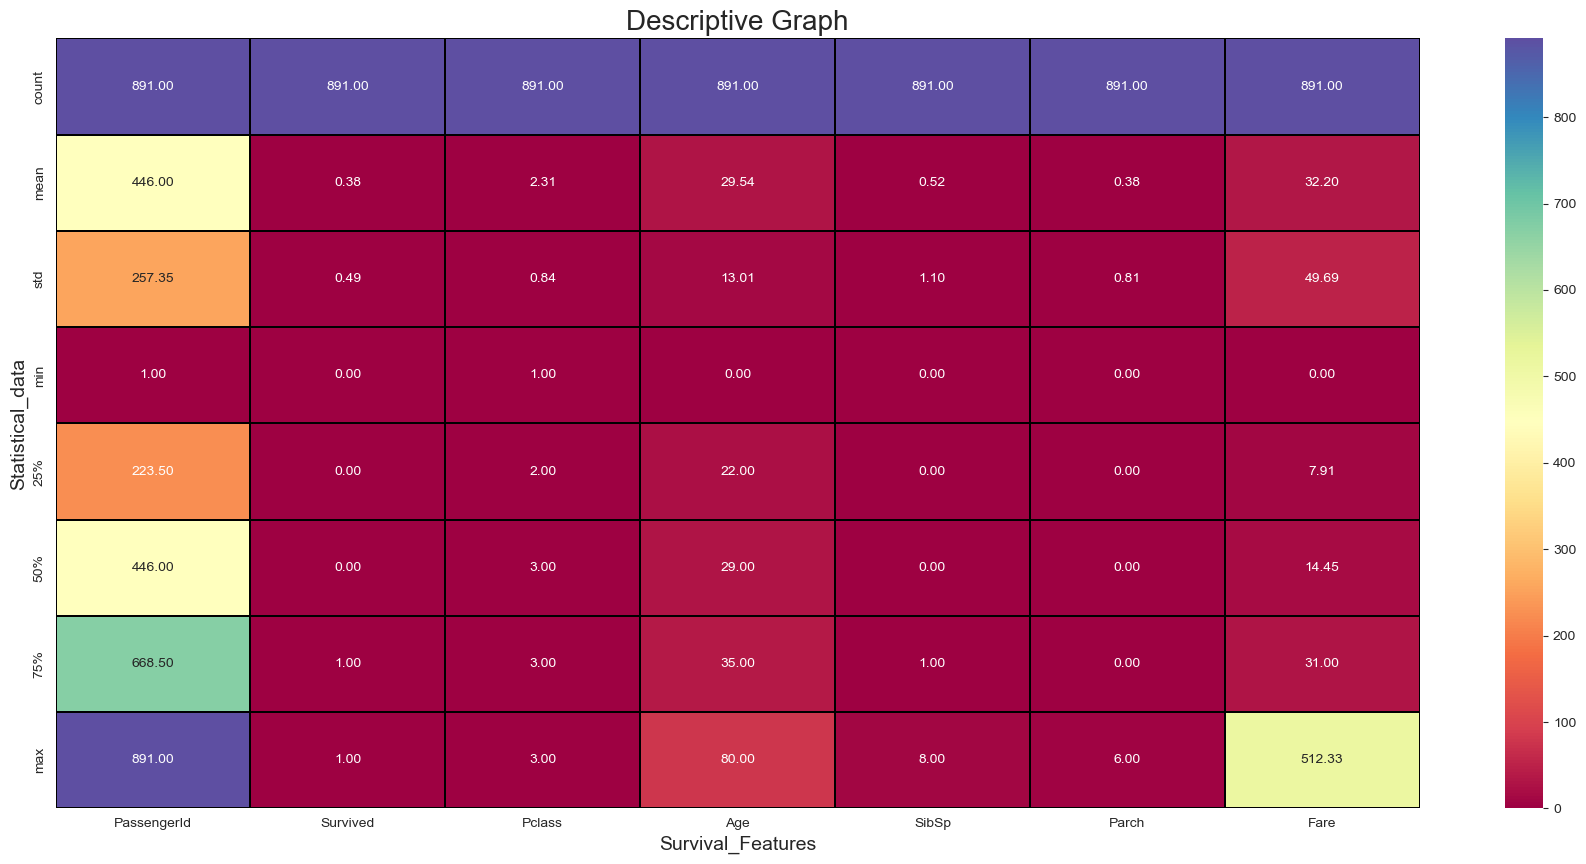

In [289]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Survival_Features',fontsize=14)
plt.ylabel('Statistical_data',fontsize=14)
plt.title("Descriptive Graph",fontsize=20)
plt.show()

# Data Visualization 

Univariate Analysis- graphing features with one variables

0    549
1    342
Name: Survived, dtype: int64


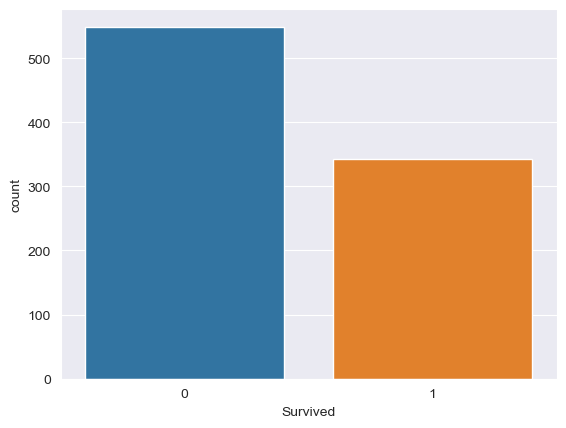

In [290]:
#visualize the number of quality column

ax=sns.countplot(x= 'Survived',data=df)
print(df['Survived'].value_counts())


29    197
24     31
22     27
28     27
30     27
     ... 
66      1
53      1
80      1
12      1
74      1
Name: Age, Length: 71, dtype: int64


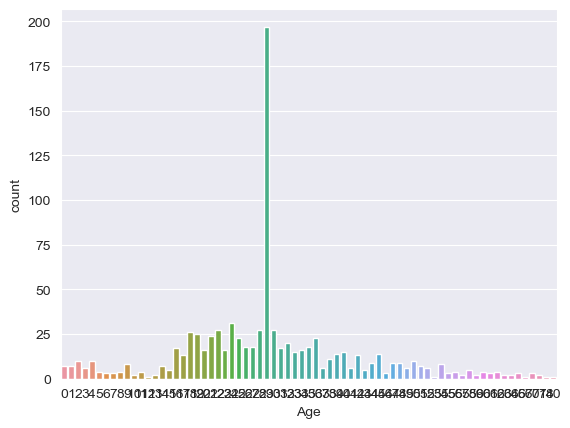

In [291]:
#visualize the number of age

ax=sns.countplot(x= 'Age',data=df)
print(df['Age'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


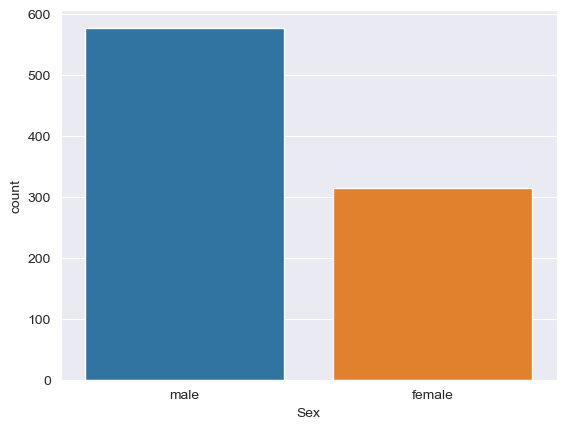

In [292]:
#visualize the number of sex column

ax=sns.countplot(x= 'Sex',data=df)
print(df['Sex'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


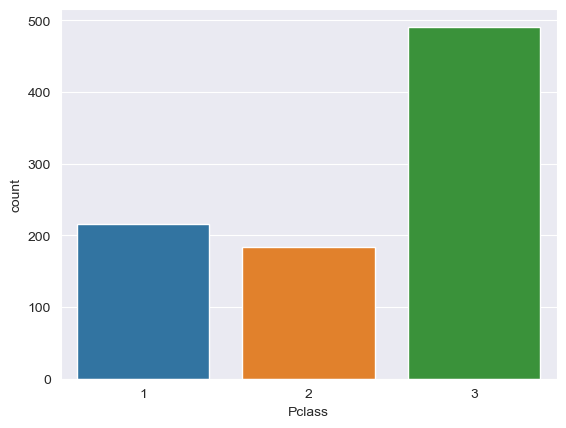

In [293]:
#visualize the number of pclass column

ax=sns.countplot(x= 'Pclass',data=df)
print(df['Pclass'].value_counts())

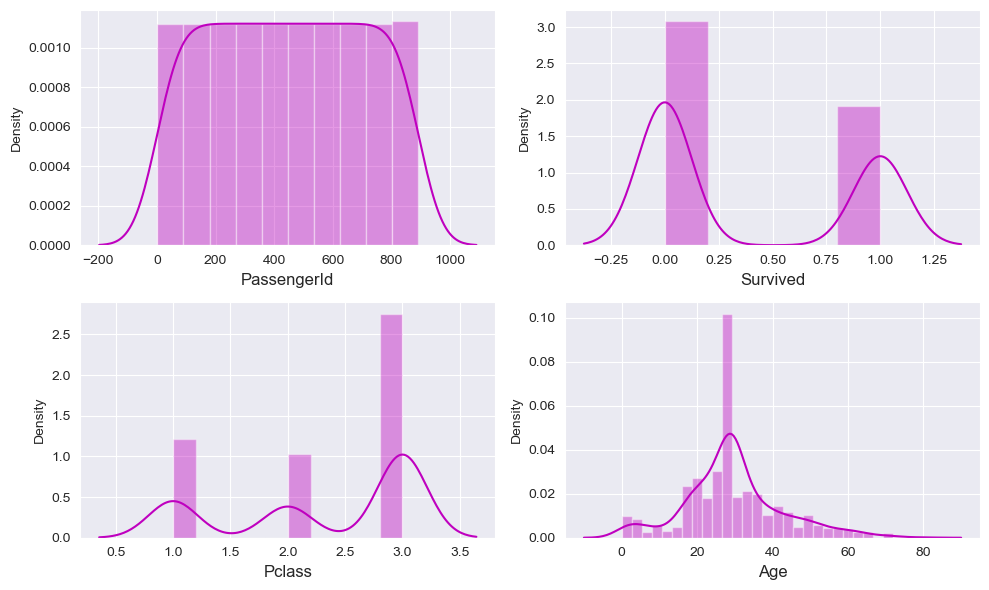

In [294]:
#Lets check how the data has been distributed in remaining column

plt.figure(figsize = (10,6), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2, 2, plotnumber) #subplot is a method 
        sns.distplot(df[col],color ="m")
        plt.xlabel(col,fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

# # Bivariate Analysis


<AxesSubplot:xlabel='Survived', ylabel='count'>

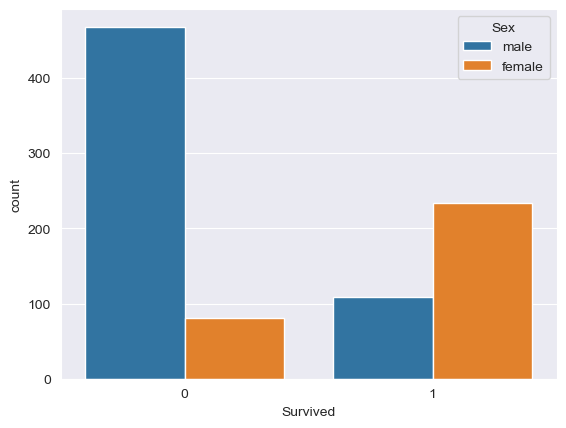

In [295]:
#Analyzing Male survived by using sex variable in count plot

sns.set_style('darkgrid')
sns.countplot(x= 'Survived', hue ='Sex',data =df)

In [296]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

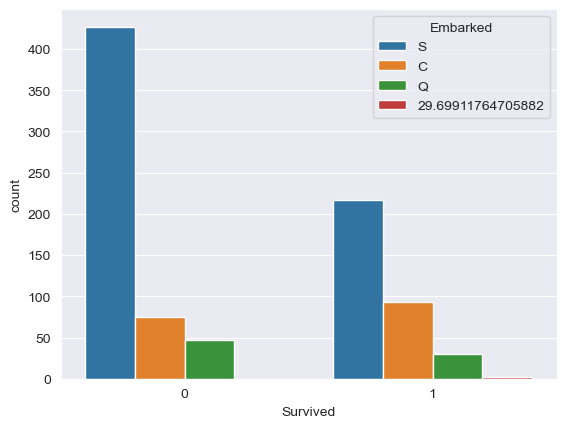

In [297]:
sns.set_style('darkgrid')
sns.countplot(x= 'Survived', hue ='Embarked',data =df)

In [117]:
df.Embarked.value_counts()

S                    644
C                    168
Q                     77
29.69911764705882      2
Name: Embarked, dtype: int64

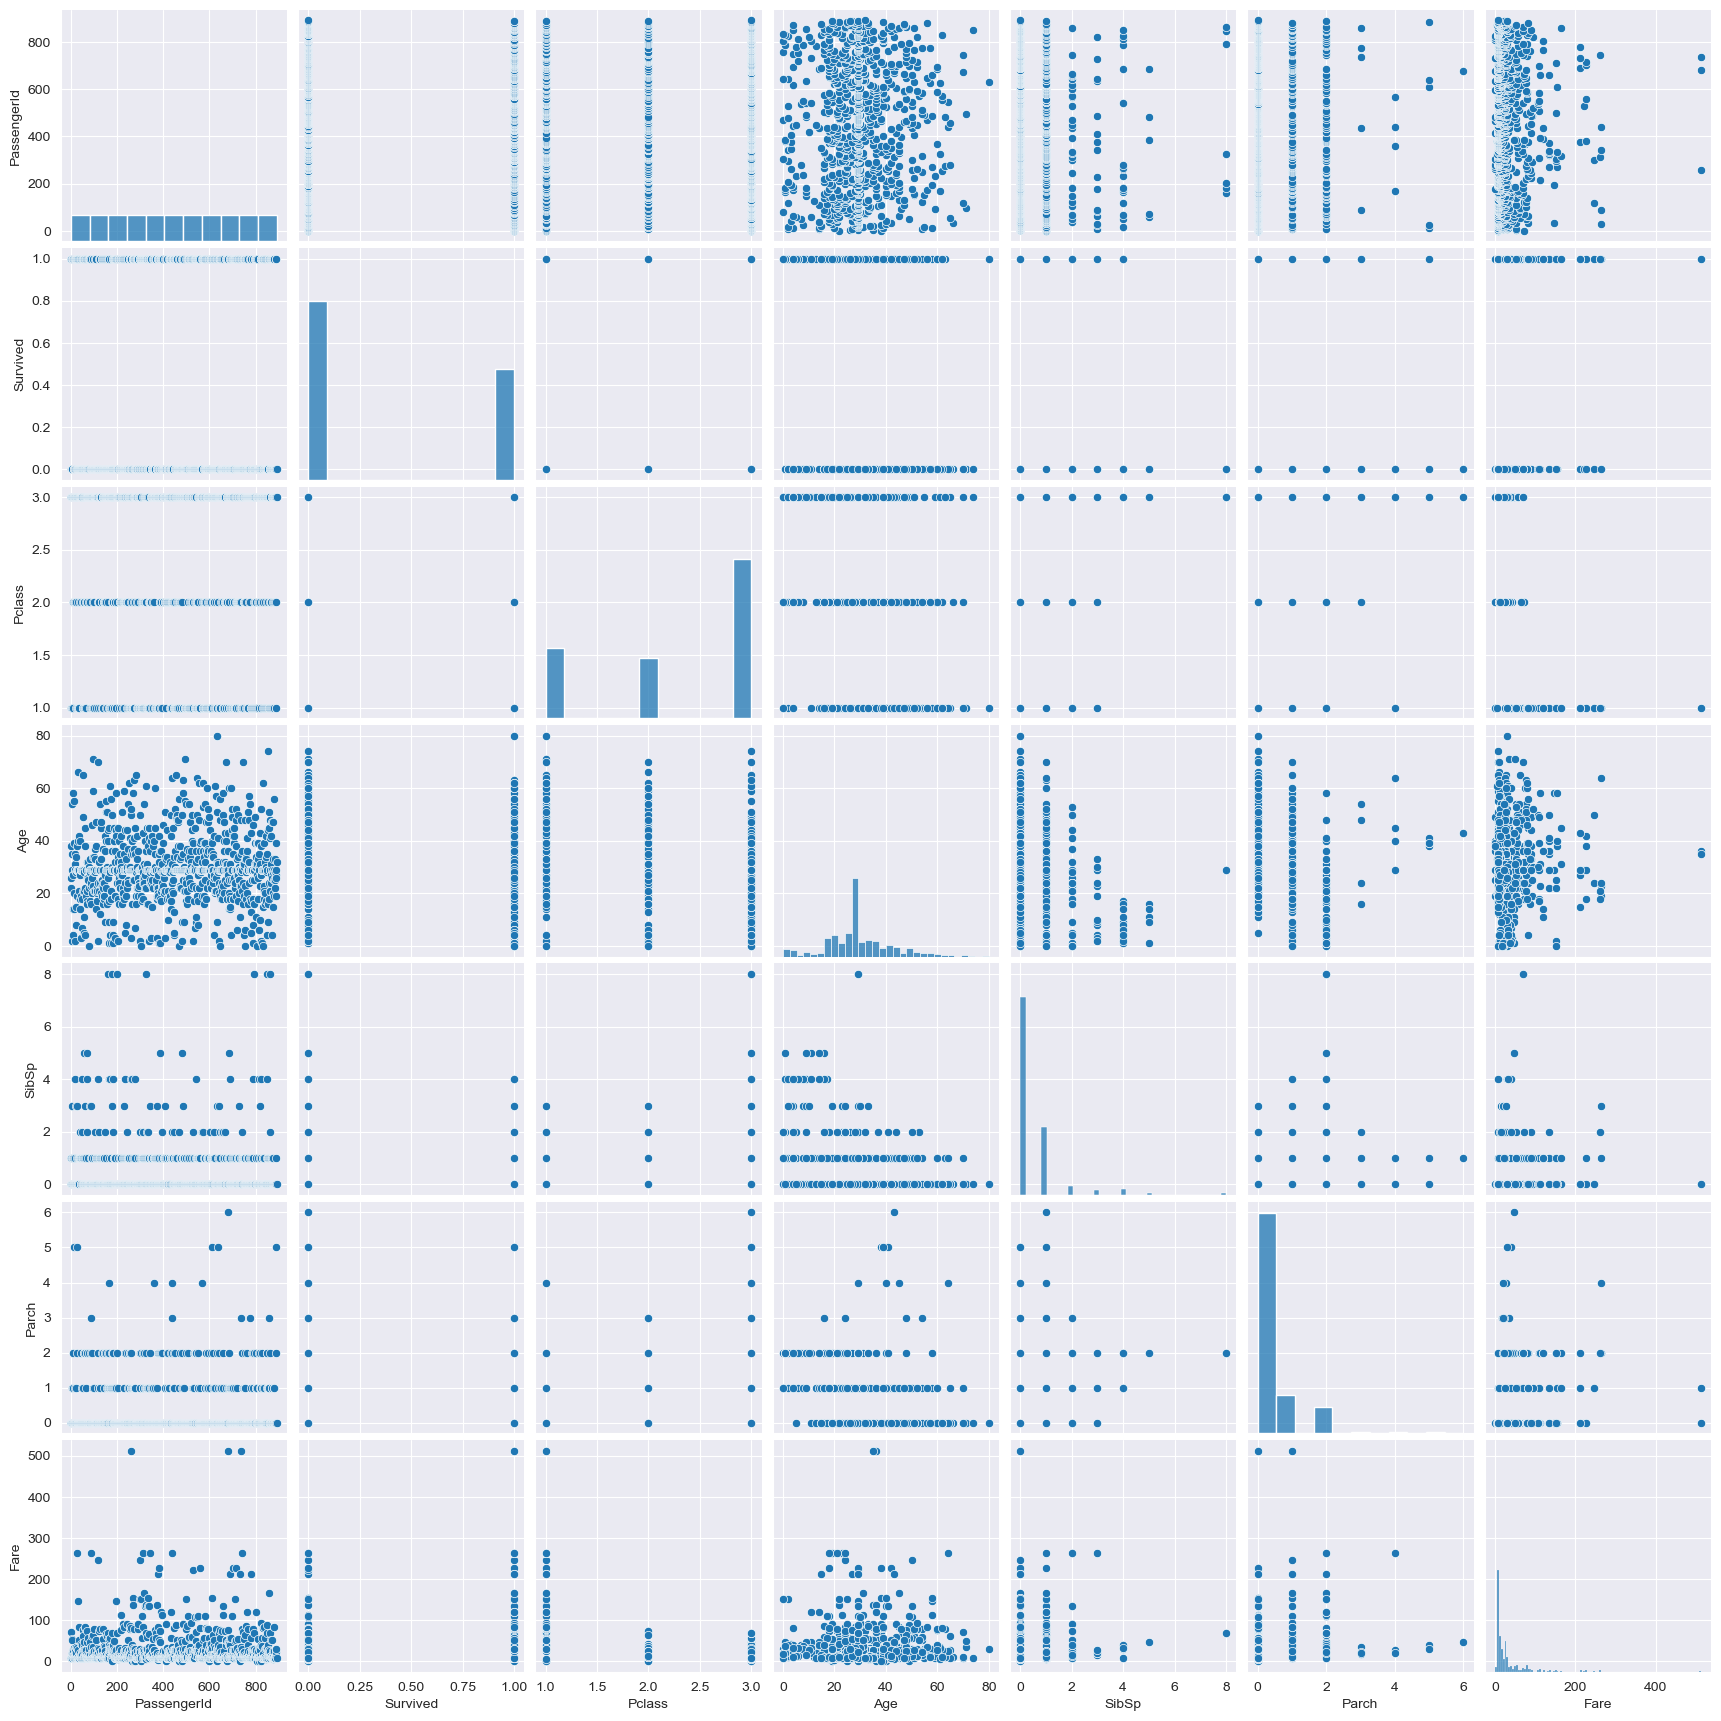

In [119]:
sns.pairplot(df)

There is no correlation in pair plot most of the data is scattered with no linear regression line. 

<AxesSubplot:xlabel='Age', ylabel='Density'>

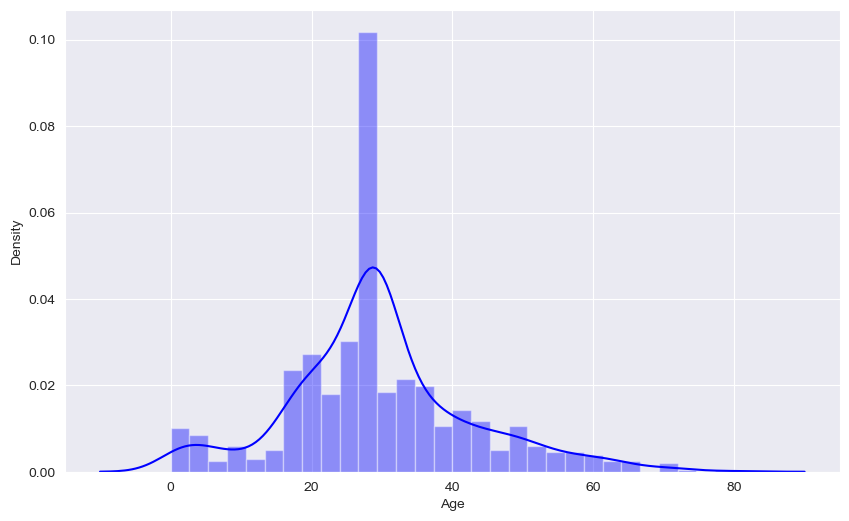

In [121]:
#Analyzing variables with diff plt

plt.figure(figsize = (10,6))
sns.distplot(df['Age'],color="blue")

Age variable has an outlier 

<AxesSubplot:xlabel='Fare', ylabel='Density'>

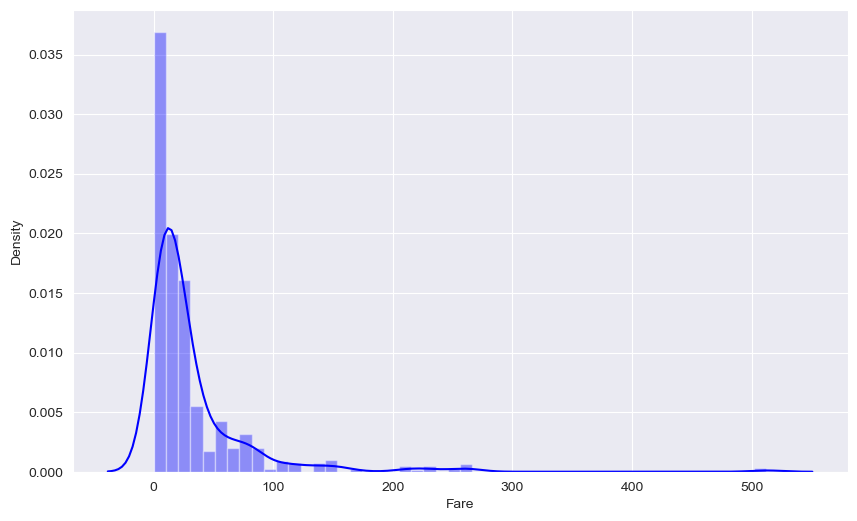

In [122]:
#Analyzing variables with diff plt

plt.figure(figsize = (10,6))
sns.distplot(df['Fare'],color="blue")

# Outliers 

In [298]:
#lets check the outliers by plotting boxplot of categorical column

from scipy.stats import zscore
out_features=df[['Fare']]
z=np.abs(zscore(out_features))
z

,Fare
0,0.502445
1,0.786845
2,0.488854
3,0.420730
4,0.486337
...,...
886,0.386671
887,0.044381
888,0.176263
889,0.044381


In [299]:
#threshold =3
np.where(z>3)

(array([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679,
        689, 700, 716, 730, 737, 742, 779], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int64))

In [300]:
df1=df[(z<3).all(axis=1)]
df1.shape

(871, 12)

In [301]:
#shape of old and new dataframe

print("old data frame",df.shape[0])
print("new data frame",df1.shape[0])

old data frame 891
new data frame 871


In [302]:
print("Data loss percentage",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss percentage 2.244668911335578


# # Correlation between target variable and independent variables


In [303]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033741,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.067809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.335071,0.083081,0.018443,-0.549500
Age,0.033741,-0.067809,-0.335071,1.000000,-0.232743,-0.176744,0.093856
SibSp,-0.057527,-0.035322,0.083081,-0.232743,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.176744,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.093856,0.159651,0.216225,1.000000


<AxesSubplot:>

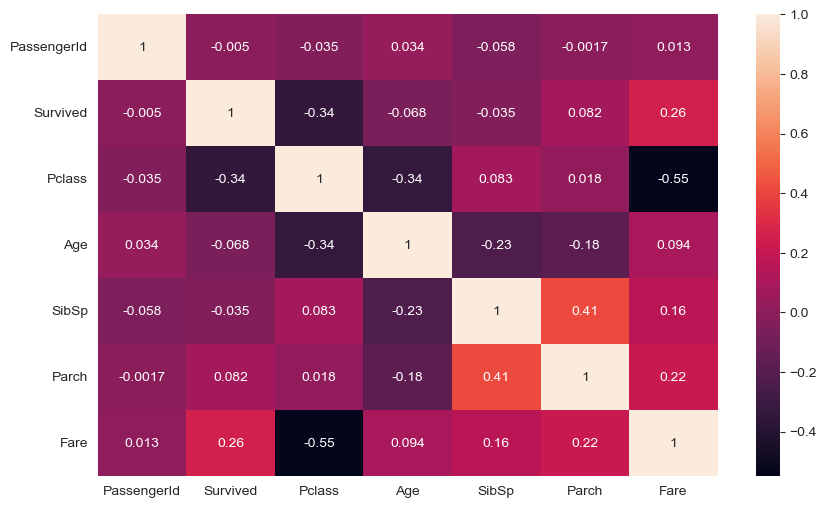

In [304]:
#visualize relation between all the variables using heatmap

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

# Data Manipulation

In [305]:
# Now we will remove columns that have the least correlation with survival column
#In our case we have Passenger Id, Age, SibSp as well is the least correlated to the survival so we will drop these columns

df.drop(['PassengerId','Age','SibSp','Name'],axis=1,inplace = True)


In [306]:
#drop Ticket is not necessary for modeling

df.drop(['Ticket'],axis=1,inplace=True)

df.head()

,Survived,Pclass,Sex,Parch,Fare,Cabin,Embarked
0,0,3,male,0,7.2500,29.699118,S
1,1,1,female,0,71.2833,C85,C
2,1,3,female,0,7.9250,29.699118,S
3,1,1,female,0,53.1000,C123,S
4,0,3,male,0,8.0500,29.699118,S


In [307]:
df

,Survived,Pclass,Sex,Parch,Fare,Cabin,Embarked
0,0,3,male,0,7.2500,29.699118,S
1,1,1,female,0,71.2833,C85,C
2,1,3,female,0,7.9250,29.699118,S
3,1,1,female,0,53.1000,C123,S
4,0,3,male,0,8.0500,29.699118,S
...,...,...,...,...,...,...,...
886,0,2,male,0,13.0000,29.699118,S
887,1,1,female,0,30.0000,B42,S
888,0,3,female,2,23.4500,29.699118,S
889,1,1,male,0,30.0000,C148,C


In [308]:
#Now we will create a dataset which our model can understand, since our data is in categorical form we need to create it in the dummie variable
#pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

Sex = pd.get_dummies(df['Sex'],drop_first=True)
Embarked=pd.get_dummies(df['Embarked'],drop_first=True)
Parch=pd.get_dummies(df['Parch'],drop_first=True)

In [309]:
#Now check the dataframe with new added columns 

df = pd.concat([df,Sex,Embarked,Parch],axis=1)

In [310]:
df.head()

,Survived,Pclass,Sex,Parch,Fare,Cabin,Embarked,male,C,Q,S,1,2,3,4,5,6
0,0,3,male,0,7.2500,29.699118,S,1,0,0,1,0,0,0,0,0,0
1,1,1,female,0,71.2833,C85,C,0,1,0,0,0,0,0,0,0,0
2,1,3,female,0,7.9250,29.699118,S,0,0,0,1,0,0,0,0,0,0
3,1,1,female,0,53.1000,C123,S,0,0,0,1,0,0,0,0,0,0
4,0,3,male,0,8.0500,29.699118,S,1,0,0,1,0,0,0,0,0,0


In [311]:
df.drop(['Sex','Parch','Embarked'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Fare,Cabin,male,C,Q,S,1,2,3,4,5,6
0,0,3,7.2500,29.699118,1,0,0,1,0,0,0,0,0,0
1,1,1,71.2833,C85,0,1,0,0,0,0,0,0,0,0
2,1,3,7.9250,29.699118,0,0,0,1,0,0,0,0,0,0
3,1,1,53.1000,C123,0,0,0,1,0,0,0,0,0,0
4,0,3,8.0500,29.699118,1,0,0,1,0,0,0,0,0,0


In [313]:
df.drop(['Cabin'],axis=1,inplace=True)
df

,Survived,Pclass,Fare,male,C,Q,S,1,2,3,4,5,6
0,0,3,7.2500,1,0,0,1,0,0,0,0,0,0
1,1,1,71.2833,0,1,0,0,0,0,0,0,0,0
2,1,3,7.9250,0,0,0,1,0,0,0,0,0,0
3,1,1,53.1000,0,0,0,1,0,0,0,0,0,0
4,0,3,8.0500,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,13.0000,1,0,0,1,0,0,0,0,0,0
887,1,1,30.0000,0,0,0,1,0,0,0,0,0,0
888,0,3,23.4500,0,0,0,1,0,1,0,0,0,0
889,1,1,30.0000,1,1,0,0,0,0,0,0,0,0


In [ ]:
#Since the values are in binary and numerical we will be using logistic regression

# Checking Variance inflation Factor(VIF)

In [314]:
#Finding variance inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2)).
#A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.
#In statistical terms, a multiple regression model where there is high multicollinearity will make it more difficult to estimate 
#the relationship between each of the independent variables and the dependent variable.

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)
            for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,VIF values,Features
0,10.432916,Pclass
1,1.955103,Fare
2,2.546656,male
3,3.042053,C
4,2.352447,Q
5,9.411735,S
6,1.202264,1
7,1.212779,2
8,1.012644,3
9,1.015995,4


In [315]:
y.value_counts()

0    549
1    549
Name: Survived, dtype: int64

# oversampling

In [316]:
#oversampling the data

from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)


In [317]:
y.value_counts()

0    549
1    549
Name: Survived, dtype: int64

# #Modeling

In [318]:
from sklearn.model_selection import train_test_split


#### Seperating independent variable with dependent variables

In [319]:
#separating the x and y

x=df.drop('Survived',axis=1)
y=df['Survived']

print("Feature Dimension",x.shape)
print("Label Dimension",y.shape)

Feature Dimension (891, 12)
Label Dimension (891,)


In [321]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=42)

In [363]:
#Creating Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [323]:
maxAccu =0
maxRS = 0
for i in range(1,160):
    x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc >maxAccu:
        maxAcc = acc
        maxRS = i

print("Max r2 score accuracy is ",maxAccu, "at random_state",maxRS)
        


Max r2 score accuracy is  0 at random_state 159


# Classification Algorithms


# Logistic Regression

In [324]:
LR= LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7873134328358209
[[132  31]
 [ 26  79]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       163
           1       0.72      0.75      0.73       105

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



## Random Forest Classifier


In [325]:
#Checking accuracy for RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.8059701492537313
[[137  26]
 [ 26  79]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       163
           1       0.75      0.75      0.75       105

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



# Spector Vector Machine Classifier

In [326]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.6492537313432836
[[152  11]
 [ 83  22]]
              precision    recall  f1-score   support

           0       0.65      0.93      0.76       163
           1       0.67      0.21      0.32       105

    accuracy                           0.65       268
   macro avg       0.66      0.57      0.54       268
weighted avg       0.65      0.65      0.59       268



# # Bagging Classifier

In [327]:
#checking accuracy for Bagging classifier

BC =BaggingClassifier()
BC.fit(x_train,y_train)
predBC = BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))


0.8059701492537313
[[139  24]
 [ 28  77]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       163
           1       0.76      0.73      0.75       105

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.81      0.81       268



# Cross Validation Score

Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. 

In [328]:
from sklearn.model_selection import cross_val_score

In [329]:
#Checking cv score for Random Forest Classifier

score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predRFC)-score.mean())


[0.78212291 0.76404494 0.8258427  0.80337079 0.8258427 ]
0.8002448057246877
Difference between Accuracy score and cross validation score is - 0.005725343529043636


In [330]:
#Checking cv score for Logistic Regression

score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predLR)-score.mean())


[0.73184358 0.78651685 0.78089888 0.7752809  0.78651685]
0.7722114117130123
Difference between Accuracy score and cross validation score is - 0.015102021122808562


In [331]:
#Checking cv score for Support Vector Machine Classifier

score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predsvc)-score.mean())


[0.58100559 0.71910112 0.6741573  0.68539326 0.67977528]
0.6678865105768628
Difference between Accuracy score and cross validation score is - -0.0186327792335792


In [346]:
#Checking cv score for Bagging Classifier
BC = BaggingClassifier()
#predBC = BC.predict(x_test)

score = cross_val_score(BC,x,y)
print("Score",score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test,predBC)-score.mean())


Score [0.75977654 0.79213483 0.85393258 0.81460674 0.8258427 ]
0.8092586780490866
Difference between Accuracy score and cross validation score is - -0.003288528795355239


# Hyperparameter Tuning

Hyperparameter tuning is the art of finding the best settings for a machine learning model

Hyperparameters are the knobs that control the learning process, such as learning rate, number of layers, or Different hyperparameters can lead to different levels of accuracy, speed, and complexity for the same model and data

In [356]:
from sklearn.model_selection import GridSearchCV

grid_parameters = {
    "n_estimators": [90,100,115,130],
    'criterion': ['grini','entropy'],
    'max_depth':range(2,20,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
     'max_features':['auto','log2']
}


In [357]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
params = {'n_neighbors': [3,5,7,9,11,13],'weights': ['uniform', 'distance'],'p': [1,2]}


GVC = GridSearchCV(estimator=knn,param_grid=params,cv=5,n_jobs=5,verbose=1)

In [358]:
# Fitting our GridSearchCV Object
GVC.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [359]:
GVC.best_params_

{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

In [386]:
DT = DecisionTreeClassifier(max_depth = 1)
bc = BaggingClassifier(dt, n_estimators = 500, max_samples = 0.5, max_features = 0.5)
bc = bc.fit(x_train, y_train)
prediction= Final_model.predict(x_test)
predictions
acc = r2_score(y_test,pred)
print(acc*100)

37.20437962916496


# saving the model

In [387]:
import joblib
joblib.dump(Final_model,"Titanic_Report.pkl")

['Titanic_Report.pkl']

#  Predicting the saved model

In [388]:
#Lets load the saved model and get the prediction

model = joblib.load("Titanic_Report.pkl")

#Prediction
prediction = model.predict(x_test)
prediction


array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0], dtype=int64)

In [389]:
a= np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
263,1,1
264,0,1
265,1,1
266,0,0


Hence, Best model to predict is the Bagging Classifier